## Simple Perceptron

A perceptron is a type of neural network consisting of one singular neuron. The perceptron is a single neuron which performs binary classification based on a linear combination of inputs. It is meant to model a neuron within the brain, firing if some threshold is met and not firing otherwise.

<p align="center">
    <img src="perceptron.png" width="500">
</p>

The perceptron is a supervised learning network that requires both a set of predictors and a set of binary labels to learn. The out put of a perceptron takes the form

\begin{aligned}
    \hat{y} = f(\sum_{i=1}^n w_i x_i)
\end{aligned}

where $f$ is a hard limit function $f(x) =  \begin{cases} 1 \colon x > 0 \\ 0 \colon else \end{cases}$.
In this case, the weights are updated linearly by the prediction error according to a rule

\begin{aligned}
    \delta w_i &= \alpha * (y-\hat{y}) \\
    w_i^{\text{new}} = w_i^{\text{old}} + \delta w_i
\end{aligned}

where $\alpha$ is a learning rate less than 1. This learning rate can be fixed or decreasing.

In order to demonstrate the simple perceptron, I have implemented a perceptron from scratch with the code to be found below.

## The Data

To demonstrate the perceptron, I have chosen to use the dataset citrus found in the citrus.csv file within this folder. The data is originally obtained from Kaggle.com and consists of 7500 fruits which are labeled as either grapefruit or orange. The predictor variables consist of five continuous metrics: diameter, weight, red, green, and blue. The red, green, and blue values refer to the color of the fruit and the diameter and weight values correspond to the size of the fruit. Below is a plot of the predictors with the orange 0 label points corresponding to oranges and the blue 1 label points corresponding to grapefruits.

(7500,)
(2500,)
(7500, 5)
(2500, 5)


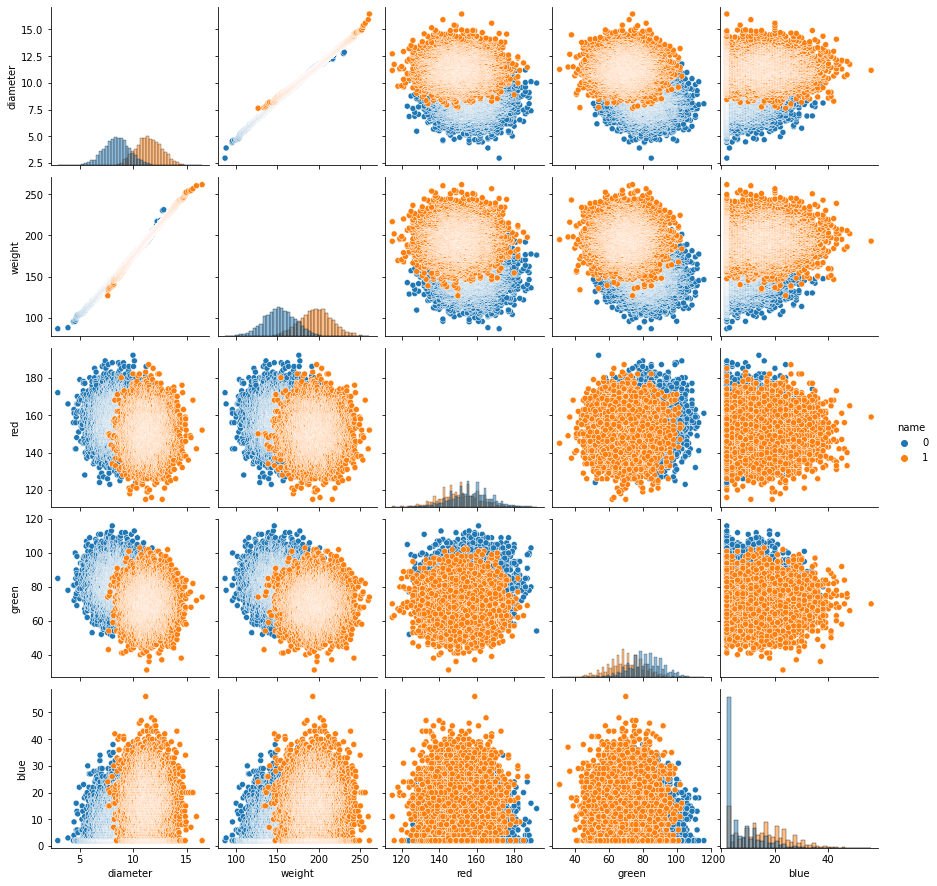

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import sklearn

df = pd.read_csv("citrus.csv")
df.name.replace("orange", 0, inplace=True)
df.name.replace("grapefruit", 1, inplace=True)
y = df.name.values
X = df.drop(columns = ["name"]).astype("float").values
scaler = sklearn.preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)
sns.pairplot(df, hue="name",diag_kind="hist")

In [44]:
class Perceptron:
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 20)
        axs.set_ylabel("Cost", fontsize = 20)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

In [49]:
def hardlim(x):
    return np.where(x>=0, 1, 0)

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_grad(x):
    return 1.0/(1.0 + np.exp(-x)) * (1- 1.0/(1.0 + np.exp(-x)))

def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

def classification_loss(y_hat, y):
    return(np.mean(y_hat != y))

Above is a collection of functions for use as activation, gradient and cost functions. Note that only the classification loss and hardlimit functions are used here.

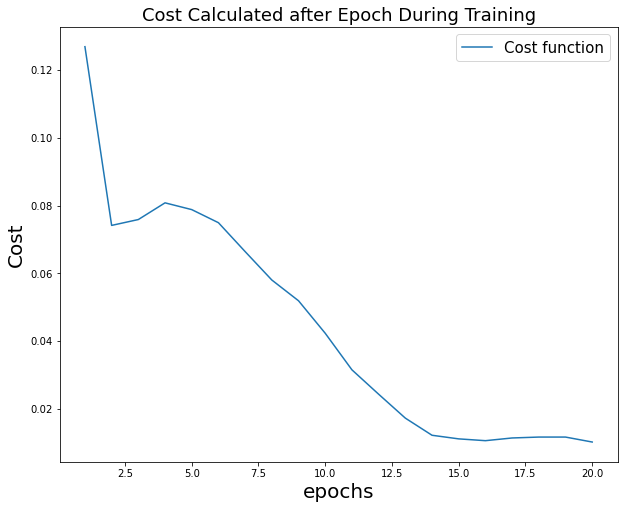

Classification error testing data:  0.0552


In [54]:
perc = Perceptron(hardlim, classification_loss)
perc.train(X_train, y_train, .001, 20)
perc.plot_cost_function()
print("Classification error testing data: ", classification_loss(perc.predict(X_test), y_test))

Based on the above plot, we can see that our perceptron fairly quickly and accurately learns how to seperate the orange and grapefruit data. The classification error of ~.06 indicates that only about 6% of all of the fruit observations are misclassified. 